Name: Tim Chen

Date: 03/11/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Exam/Sports_Training.csv')
df_pred = pd.read_csv('/content/drive/MyDrive/IST347/Exam/Sports_Scoring.csv')

In [3]:
df.shape

(493, 9)

In [4]:
df.head()

,Age,Strength,Quickness,Injury,Vision,Endurance,Agility,Decision_Making,Prime_Sport
0,15.1,3,2,1,2,3,29,4,Football
1,15.4,3,2,0,3,5,18,8,Baseball
2,13.6,5,5,0,2,5,27,28,Hockey
3,18.8,5,1,1,1,3,48,36,Hockey
4,16.1,3,1,0,3,3,38,29,Football


In [5]:
df.isna().sum()

Age                0
Strength           0
Quickness          0
Injury             0
Vision             0
Endurance          0
Agility            0
Decision_Making    0
Prime_Sport        0
dtype: int64

In [6]:
df_new = df.loc[(df.Decision_Making >= 3) & (df.Decision_Making  <= 100)]

In [7]:
df_new.describe()

,Age,Strength,Quickness,Injury,Vision,Endurance,Agility,Decision_Making
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,15.954564,3.500000,1.983402,0.639004,1.692946,3.856846,33.680498,29.157676
std,1.817320,1.460854,1.505269,0.480788,1.134010,1.331782,12.523973,19.477265
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000
25%,14.300000,3.000000,1.000000,0.000000,1.000000,3.000000,23.000000,11.000000
50%,15.900000,4.000000,1.000000,1.000000,2.000000,5.000000,31.500000,29.000000
75%,17.600000,4.000000,2.000000,1.000000,3.000000,5.000000,42.750000,40.000000
max,19.000000,7.000000,6.000000,1.000000,3.000000,6.000000,80.000000,100.000000


In [8]:
sport_d = {'Football':'0', 'Baseball':'1','Hockey':'2', 'Basketball':'3'}
df_new['Prime_Sport'] = df_new['Prime_Sport'].map(sport_d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
X = df_new.drop('Prime_Sport', axis = 1).values
y = df_new['Prime_Sport'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**Naive Bayes**

In [11]:
model = GaussianNB()
clf = model.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        40
           1       0.40      0.55      0.46        29
           2       0.30      0.25      0.27        24
           3       0.31      0.14      0.20        28

    accuracy                           0.41       121
   macro avg       0.38      0.39      0.37       121
weighted avg       0.39      0.41      0.39       121



In [14]:
print(confusion_matrix(y_test, y_pred))

[[24  7  6  3]
 [ 7 16  2  4]
 [11  5  6  2]
 [ 6 12  6  4]]


In [15]:
# predict on Sports_Scoring.csv
naive_pred = clf.predict(df_pred.values)

**KNN**

In [16]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
knn_model_s = KNeighborsClassifier(n_neighbors = 1)
knn_model_s.fit(scaled_X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
y_pred_s= knn_model_s.predict(scaled_X_test)
accuracy_score(y_test, y_pred_s)

0.33884297520661155

In [19]:
test_error_rates_s = []
best_k = 0
error = 1

for k in range(1,51):
  # test different K to find the best accuracy score
  knn_model_test = KNeighborsClassifier(n_neighbors = k)
  knn_model_test.fit(scaled_X_train, y_train)

  y_pred = knn_model_test.predict(scaled_X_test)
  test_error = 1 - accuracy_score(y_test, y_pred)
  test_error_rates_s.append(test_error)

  if test_error < error:
    error = test_error
    best_k = k


Text(0.5, 0, 'k value')

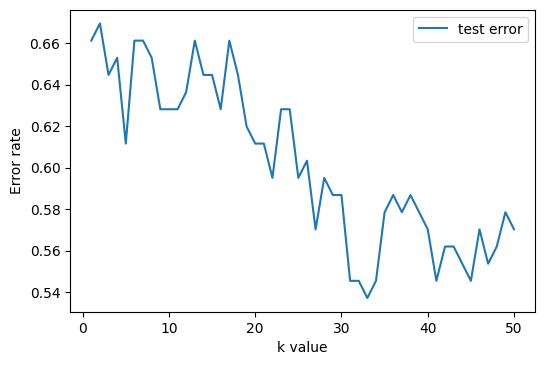

In [20]:
plt.figure(dpi=100)
plt.plot(range(1,51), test_error_rates_s,label = 'test error')
plt.legend()
plt.ylabel('Error rate')
plt.xlabel('k value')

In [21]:
print(f"Best k is {best_k}")
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(scaled_X_train, y_train)

Best k is 33


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [22]:
best_knn_pred = best_knn_model.predict(scaled_X_test)
accuracy_score(y_test,best_knn_pred)

0.4628099173553719

In [23]:
print(classification_report(y_test, best_knn_pred))

              precision    recall  f1-score   support

           0       0.47      0.68      0.55        40
           1       0.41      0.52      0.45        29
           2       0.50      0.29      0.37        24
           3       0.58      0.25      0.35        28

    accuracy                           0.46       121
   macro avg       0.49      0.43      0.43       121
weighted avg       0.49      0.46      0.45       121



In [24]:
print(confusion_matrix(y_test, best_knn_pred))

[[27  8  3  2]
 [10 15  3  1]
 [11  4  7  2]
 [10 10  1  7]]


In [25]:
knn_scale_result = best_knn_model.predict(df_pred.values)

In [26]:
print(naive_pred) #predict on scoring for naive method
print(knn_scale_result) #predict on scoreing for knn scale method

['3' '1' '2' ... '0' '3' '2']
['3' '1' '0' ... '0' '1' '0']


In [27]:
# count = 0 
# for n,k in zip(naive_pred, knn_scale_result):
#   if n == k:
#     count +=1
# count

The accuracy rate from the KNN method is higher than the Naive Bayes method in my setting. I am assuming KNN has higher accuracy because, in this dataset, a lazy method can predict the result better. Since this dataset contains more data like human strength or speed, the KNN algorithm might memorize them and use them for prediction. On the other hand, the Naive Bayes method use probability of making the prediction. It seems not as effective as KNN for this dataset. Another reason I am guessing is the training dataset has only 483 data points. We build a model on this 483 data, it might not create the best model. Therefore, KNN might able to memorize everything then do better prediction work. Typically, in a machine learning model, we would use 80% training versus 20% testing. However, this dataset is doing the opposite. I created a model on 25% data and predicted testing data on the other 75% (when I predict on the scoring file). Although I don't know the real answer of the testing data, so I am not sure how effective my model is when predictong on the scoring dataset. This accuracy might not be the best situation for both machine learning algorithms, but KNN presented a better work with this amount of data and better prediction. 